# 회기분석

회기분석: 독립변수와 종속변수가 모두연속형인 경우, 변수간 인과관계(영향관계)를 파악하기 위함
독립변수와 종속변수 사이의 선형식을 구해 종속변수에 대한 독립변수의 예측력(영향력)을 분석

검정통계량 :모형F검증, 변수t검증 ->유의확률(p) 계산

회귀분석의 종류
- 단순회귀분석:독립변수(원인) 1개가 결과변수에 영향을 미치는가를 파악하는 분석
- 다중회귀분석:독립변수(원인) 2개 이상이 결과변수에 영향을 비치는가를 파악하는 분석- 여러 원인변수에서 어느 변수가 결과변수에 더 중요한 영향을 미치는가' 파악 목적

실제 분석에서는 단일회귀분석보다 다중회귀분석이 더 많이 사용됨


### 특징
- 회귀식은 최소제곱법 방식으로 작성됨
    - 관측점들과 회귀선간에 수직석을 기르고 그 거리를 각각제곱하여 더한 값으로 각 곽츤값에서 추정된 직선까지의 거리의 제곱합이 최소가 되도록 회귀계수를 구하는 것

- 잔차: 관측값과 예측값의 차이로, 관측값과 회귀선의 수직거리를 의미함

- 단순회귀식
    - $Y=aX+b$(a:회귀 계수/ b: 절편)
- 다중회귀식
    - $Y=a1X1+a2X2+a3X3+...anXn+b $

In [1]:
import pandas as pd

In [6]:
bank=pd.read_csv("bank.csv",sep=";")

In [4]:
#회귀분석 전 상관관계 파악
from scipy import stats

In [7]:
corr = stats.pearsonr(bank.age, bank.balance)
corr

(0.08382014224477766, 1.658480874647685e-08)

In [8]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

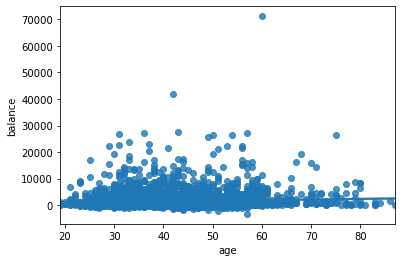

In [10]:
sns.regplot("age","balance",bank) #회귀선 + 신뢰구간
plt.show

C:\Users\201710612\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='age'>

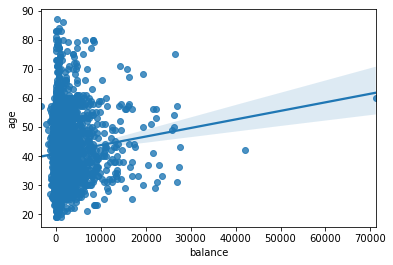

In [11]:
#회귀선이 잘 안보일때 y와 x를 바꿔보자
sns.regplot("balance","age",bank)
#회귀선과 신뢰구간이 나타남

In [12]:
# 회귀분석
#statsmodels:다양한 R언어용 회구분석 모델을 구현한 통계분석 패키지
import statsmodels.formula.api as smf

In [14]:
linear_model = smf.ols("balance~age",bank).fit()

In [15]:
linear_model

In [16]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     31.97
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.66e-08
Time:                        18:29:09   Log-Likelihood:                -42610.
No. Observations:                4521   AIC:                         8.522e+04
Df Residuals:                    4519   BIC:                         8.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    440.6511    179.303      2.458      0.014      89.129     792.173
age           23.8524      4.218      5.655      0.000      15.583      32.122
==============================================================================
Omnibus:                     5648.224   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1475688.206
Skew:                           6.557   Prob(JB):                         0.00
Kurtosis:                      90.532   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- $R^2$(설명력/결정계수)는 0.007로 종속변수 분산의 0.7%가 도릭변수에 의해 설명된다.(앞에서 말한 상관계수의 제곱과 같다.
- F값은 31.97이며 유의확률은 .00으로 유의수준. .05에서 회귀모형이 통계쩍으로 유의하다고 할 수 있다.
- 회귀계수가 통계적으로 유의한가를 검정하는 t값은 5.65, 유의확률은 .000으로 유의수준 .05에서 회귀계수는 유의한 값이다.
- age에 대한 회귀계수는 '+'로 나타났으며 유의하므로 영가설은 기각되고 연구가설은 지지된다. 즉, age의 증가에 따라 balance가 증가하는 경향이 있는 것으로 해석 된다.
- 이때 회귀식은 $Y=440.6511+23.8524X$

# 로지스틱 회귀분석
- 로지스틱 회구선은 회귀분석과 개념은 동일하나 종속변수가 이분변수인 점만 다름
- 독립변수의 선형결합을 이용하여 사건의 발생 가능성을 예측하는데 사용하는 통계적 기법
- 로지스틱 회귀분석에 중요한 요소는 Odds, 로짓변환, 시그모이드 함수

### 로지스틱 회귀분석의 요소
- Odds
    - p/(1-p):성공 확률이 실패 확률보다 몇 배 더 높은가를 나타내는 비율, 범위는 [0,∞)
    - ex)게임에서 오지비가 1/4이라면 5번게임해서 1번이기고 4번 진다는 뜻임
    
- 로짓함수:종속변수로 Y를 사용하는 대식에 로짓함수 사용
- sigmoid:비선형 함수를 이용하여 모든 추정값을 [0,1]사이의 확률값으로 바꿔줌



In [18]:
import pandas as pd

In [19]:
bank =pd.read_csv("bank.csv",sep=";")

### 변수 recode
- 로지스틱 회귀분석은 변수의 값이 모두 숫자형이어야 하므로 명목형 변수의 값을 숫자로recode

In [20]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [21]:
bank["marital_G"] = bank['marital'].replace(["single","married","divorced"],
                                            [1,2,3])
bank['marital_G'].head()

0    2
1    2
2    1
3    2
4    2
Name: marital_G, dtype: int64

In [23]:
bank['marital_G'].value_counts()

2    2797
1    1196
3     528
Name: marital_G, dtype: int64

In [24]:
# education
bank["education_G"]= bank['education'].replace(["primary","secondary","tertiary","unknown"],
                                              [1,2,3, None])
# housing
bank["housing_G"]= bank['housing'].replace(["yes","no"],[1,0])

#loan
bank["loan_G"]= bank['loan'].replace(["yes","no"],[1,0])

#default
bank["default_G"]= bank['default'].replace(["yes","no"],[1,0])

#contact
bank["contact_G"]= bank['contact'].replace(["cellular","telephone","unknown"],[1,2,None])

#poutcome
bank["poutcome_G"]= bank['poutcome'].replace(["failure","success","unknown","other"],[1,2,None,None])

#y
bank["y_G"]= bank['y'].replace(["yes","no"],[1,0])

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,marital_G,education_G,housing_G,loan_G,default_G,contact_G,poutcome_G,y_G
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,unknown,no,2,1.0,0,0,0,1.0,NaN,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,failure,no,2,2.0,1,1,0,1.0,1.0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,failure,no,1,3.0,1,0,0,1.0,1.0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,unknown,no,2,3.0,1,1,0,NaN,NaN,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,unknown,no,2,2.0,1,0,0,NaN,NaN,0


- 데이터셋 만들기
    - y_G, age, duration, pdays, marital_G, loan_G, contact_G

In [26]:
bank_lr=bank[["y_G", 'age', 'duration', 'pdays', 'marital_G', 'loan_G', 'contact_G']]
bank_lr.head()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G
0,0,30,79,-1,2,0,1.0
1,0,33,220,339,2,1,1.0
2,0,35,185,330,1,0,1.0
3,0,30,199,-1,2,1,NaN
4,0,59,226,-1,2,0,NaN


In [27]:
bank_lr.isnull().sum()

y_G             0
age             0
duration        0
pdays           0
marital_G       0
loan_G          0
contact_G    1324
dtype: int64

In [28]:
bank_lr_na=bank_lr.dropna() #결측값 있는 행을 지움

In [29]:
bank_lr_na.info() #데이터 개수는 3197인데 익데스는 4520까지

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3197 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y_G        3197 non-null   int64  
 1   age        3197 non-null   int64  
 2   duration   3197 non-null   int64  
 3   pdays      3197 non-null   int64  
 4   marital_G  3197 non-null   int64  
 5   loan_G     3197 non-null   int64  
 6   contact_G  3197 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 199.8 KB


In [30]:
bank_lr_na = bank_lr_na.reset_index() #index를 새로지정
bank_lr_na.head()

,index,y_G,age,duration,pdays,marital_G,loan_G,contact_G
0,0,0,30,79,-1,2,0,1.0
1,1,0,33,220,339,2,1,1.0
2,2,0,35,185,330,1,0,1.0
3,5,0,35,141,176,1,0,1.0
4,6,0,36,341,330,2,0,1.0


In [31]:
bank_lr_na = bank_lr_na.drop(["index"], axis=1) #index 커럼을 제거
bank_lr_na.head

<bound method NDFrame.head of       y_G  age  duration  pdays  marital_G  loan_G  contact_G
0       0   30        79     -1          2       0        1.0
1       0   33       220    339          2       1        1.0
2       0   35       185    330          1       0        1.0
3       0   35       141    176          1       0        1.0
4       0   36       341    330          2       0        1.0
...   ...  ...       ...    ...        ...     ...        ...
3192    0   32       624     -1          1       0        1.0
3193    0   33       329     -1          2       0        1.0
3194    0   57       151     -1          2       0        1.0
3195    0   28       129    211          2       0        1.0
3196    0   44       345    249          1       1        1.0

[3197 rows x 7 columns]>

In [33]:
bank_lr_na.info() #index 3197개 데이터개수 3197개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y_G        3197 non-null   int64  
 1   age        3197 non-null   int64  
 2   duration   3197 non-null   int64  
 3   pdays      3197 non-null   int64  
 4   marital_G  3197 non-null   int64  
 5   loan_G     3197 non-null   int64  
 6   contact_G  3197 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 175.0 KB


- #### 로지스틱 회귀모형

In [34]:
import statsmodels.formula.api as smf

In [35]:
logit_model = smf.logit("y_G ~ age + duration + pdays + C(marital_G) + C(loan_G) + C(contact_G)", data=bank_lr_na).fit()
# 범주형 변수는 C함수를 적용시켜줘야한다.

Optimization terminated successfully.
         Current function value: 0.340131
         Iterations 7


In [36]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.174     
Dependent Variable:  y_G               AIC:               2190.8001 
Date:                2021-02-10 19:32  BIC:               2239.3599 
No. Observations:    3197              Log-Likelihood:    -1087.4   
Df Model:            7                 LL-Null:           -1317.0   
Df Residuals:        3189              LLR p-value:       4.6240e-95
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept           -3.4404   0.2281 -15.0798 0.0000 -3.8876 -2.9932
C(marital_G)[T.2]   -0.3806   0.1392  -2.7332 0.0063 -0.6535 -0.1077
C(marital_G)[T.3]   -0.0581   0.1969  -0.2951 0.7679 -0.4439  0.3277
C(loan_G)[T.1]      -0.9641   0.2008  -4.8011 0.0000 -1.3577 -0.5705
C(contact_G)[T.2.0] -0.0277   0.2019  -0.1371 0.8909 -0.4233  0.3680
age                  0.0165   0.0055   3.0075 0.0026  0.0057  0.0272
duration             0.0036   0.0002  17.7364 0.0000  0.0032  0.0040
pdays                0.0018   0.0004   4.0722 0.0000  0.0009  0.0026
====================================================================

"""

age, duration, pdays의 계수는 '+', marital_G(2(married),3(divorced)),loan_G(1(yes)),contact_G(2(telephone))의 계수는 '-'로 나타났으며, 통계적으로 유의하다.
#### *marital_G[T,2,0]과 marital_G[T,3]은 통계적으로 유의하지 않다.

- log likelihood:0에 가까울수록 모델 적합도가 좋음. 회귀모델의 F검정과 동일하다고 볼 수 있음. 전직, 후진제거법을 통해서 필요한 변수만을 선별 


#### 오즈구하기

In [39]:
import numpy as np
np.exp(logit_model.params) #지수함수

Intercept              0.032052
C(marital_G)[T.2]      0.683454
C(marital_G)[T.3]      0.943562
C(loan_G)[T.1]         0.381319
C(contact_G)[T.2.0]    0.972695
age                    1.016632
duration               1.003636
pdays                  1.001779
dtype: float64

age 의 경우 유의하므로, age가 1만큼커지면 y가 no일 확률 대비 yes일 확률의 비율이 이전에 비해 약 1.02배가 된다.

#### 로지스틱 회귀분석

In [40]:
#각 케이스별 종속변수 예측 확률을 predict()함수를 이용해 구함
predict =pd.DataFrame({"predict": logit_model.predict()})

In [41]:
#bank_lr_na데이터에 예측활률 predict값을 추가
bank_lr_na["predict"] = predict
bank_lr_na.head()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G,predict
0,0,30,79,-1,2,0,1.0,0.045597
1,0,33,220,339,2,1,1.0,0.055210
2,0,35,185,330,1,0,1.0,0.167266
3,0,35,141,176,1,0,1.0,0.115214
4,0,36,341,330,2,0,1.0,0.197323


In [42]:
# 가입여부(0,1)을 예측하도록 함수 생성
#예측 확률 0.5를 기준으로 0.5보다 작으면 0, 0.5이상이면 1의 2개 그룹을 생성하도록 함
def pre_group(series):
    if series<0.5:
        return 0
    if series>=0.5:
        return 1

In [43]:
bank_lr_na["preGroup"] = bank_lr_na['predict'].apply(pre_group)
bank_lr_na.head()

,y_G,age,duration,pdays,marital_G,loan_G,contact_G,predict,preGroup
0,0,30,79,-1,2,0,1.0,0.045597,0
1,0,33,220,339,2,1,1.0,0.055210,0
2,0,35,185,330,1,0,1.0,0.167266,0
3,0,35,141,176,1,0,1.0,0.115214,0
4,0,36,341,330,2,0,1.0,0.197323,0


In [44]:
#교차표로 예측력 확인하기
pd.crosstab(bank_lr_na.y_G, bank_lr_na.preGroup, margins = True, normalize = True)

preGroup,0,1,All
y_G,,,
0,0.839537,0.016578,0.856115
1,0.116985,0.026900,0.143885
All,0.956522,0.043478,1.000000


0일때 0 인거와 1일때 1인것의 비율의 합으로 보아 예측력이 86.6%정도 되는 것을 확인 할 수 있다.

In [45]:
#sklearn 모듈이용
from sklearn.linear_model import LogisticRegression

In [46]:
#종속변수와 독립변수를 분리해준다.
y=bank_lr_na[["y_G"]]

In [47]:
X=bank_lr_na[['age','duration','pdays','marital_G','loan_G','contact_G']]

In [49]:
#모델 생성
logit =LogisticRegression()

LogisticRegression()

In [50]:
#모델에 독립변수, 종속변수 넣어 적합
logit.fit(X,y)

C:\Users\201710612\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\201710612\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#모델을 이용한 y값 예측
y_pred=logit.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#confusion_matrix, accuracy_score 이용한 예측률 확인

In [54]:
mat = confusion_matrix(y_pred, y)
mat

array([[2686,  374],
       [  51,   86]], dtype=int64)

In [55]:
acc = accuracy_score(y_pred,y)
acc

0.8670628714419768

# 의사결정나무
- 의사결정 규칙을 나무 구조로 나타내 전체 자료를 몇 개의 소집단으로 분류하거나 예측하는 분석방법

In [56]:
import pandas as pd

In [57]:
bank=pd.read_csv("bank.csv",sep=";")

In [58]:
# 리코딩
#marital
bank["marital_G"] = bank['marital'].replace(["single","married","divorced"],
                                            [1,2,3])

#education
bank["education_G"]= bank['education'].replace(["primary","secondary","tertiary","unknown"],
                                              [1,2,3, None])
# housing
bank["housing_G"]= bank['housing'].replace(["yes","no"],[1,0])

#loan
bank["loan_G"]= bank['loan'].replace(["yes","no"],[1,0])

#default
bank["default_G"]= bank['default'].replace(["yes","no"],[1,0])

#contact
bank["contact_G"]= bank['contact'].replace(["cellular","telephone","unknown"],[1,2,None])

#poutcome
bank["poutcome_G"]= bank['poutcome'].replace(["failure","success","unknown","other"],[1,2,None,None])

#y
bank["y_G"]= bank['y'].replace(["yes","no"],[1,0])

In [64]:
#데이터셋 만들기
bank_dt=bank[["y_G","age","duration","pdays","marital_G","loan_G","contact_G"]]

In [65]:
bank_dt_na= bank_dt.dropna().reset_index()

In [66]:
bank_dt_na=bank_dt_na.drop(['index'],axis=1)

In [67]:
bank_dt_na['contact_G']=bank_dt_na['contact_G'].astype('int')

In [68]:
bank_dt_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   y_G        3197 non-null   int64
 1   age        3197 non-null   int64
 2   duration   3197 non-null   int64
 3   pdays      3197 non-null   int64
 4   marital_G  3197 non-null   int64
 5   loan_G     3197 non-null   int64
 6   contact_G  3197 non-null   int32
dtypes: int32(1), int64(6)
memory usage: 162.5 KB


### data분리
- 의사결정나무 모델을 만들고(훈련) 예측력 확인(테스트)을 위해 데이터 분리
- 우선타겟변수와 원인변수를 구분하고 각각을 다시 훈련 데이터와 테스트 데이터로 구분

In [69]:
X=bank_dt_na.loc[:,"age":]
y=bank_dt_na.loc[:,"y_G"]

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test,y_train,y_test=train_test_split(X,y,
                                                test_size=0.3,
                                                random_state=1234)
#test_size 옵션을 0.3으로 지정하여 전체 데이터의 30%를 테스트 데이터로 분류
#random_state로 테스트 데이터를 분류하는 시작점을 지정하여 ㅣ후 실행에도 동일한 분류 결과가 나오도록함


In [72]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
tree_clf = DecisionTreeClassifier(random_state=1234)
tree_clf.fit(X_train,y_train)
tree_clf.score(X_train,y_train)
# 오버피팅 되지 않도록 모델을 만들 때 max_depth 옵션을 이용해 깊이를 ㅗ정
# *오버피팅:너무 훈련데이터에만 딱 맞게 모델이 만들어지는 현상

0.9986589181940099

In [76]:
tree_clf = DecisionTreeClassifier(max_depth = 4,random_state=1234)
tree_clf.fit(X_train,y_train)
tree_clf.score(X_train,y_train)
#깊이를 조정 후 생성된 의사결정나무 모델의 예측력은 약 87.8%

0.8784085829235584

#### 예측 정확도확인
- 생선한 의사결정나무 모델에 테스트 데이터의 원인변수를 넣어 결과를 예측 한 후 실제 타겟 값과 예측한 값을 비교해 정확도 확인

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
y_pred=tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8572916666666667

#### 시각화

In [77]:
!pip install graphviz

In [80]:
from sklearn.tree import export_graphviz
import graphviz

In [81]:
export_graphviz(tree_clf,
               out_file="bank_DT.dot",
               feature_names=["age","duration","pdays","marital_G","loan_G","contact_G"],
               class_names=["no","yes"],
               filled=True)
#out_file:생성될 파일의 이름을 지정
#feature_names 옵션으로 원인변수 이름을, class_names로 타겟 그룹 값을 지정
#filled 옵션으로 그래프 색을 채움

In [82]:
with open("bank_DT.dot") as f:
    dot_graph =f.read()

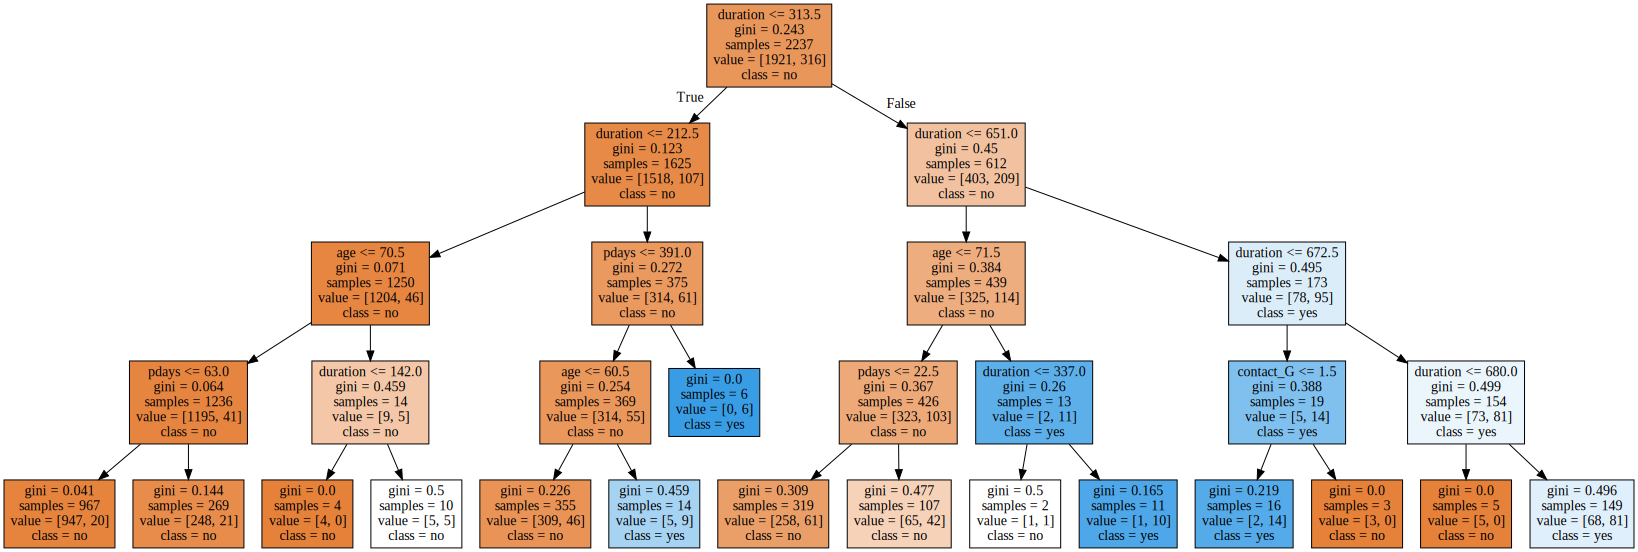

In [83]:
graphviz.Source(dot_graph)
#Source함수로 그래프 생성

In [85]:
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='bank_DT',cleanup=True)
#format()과 render()함수를 이용해 png파일로 저장

'bank_DT.png'

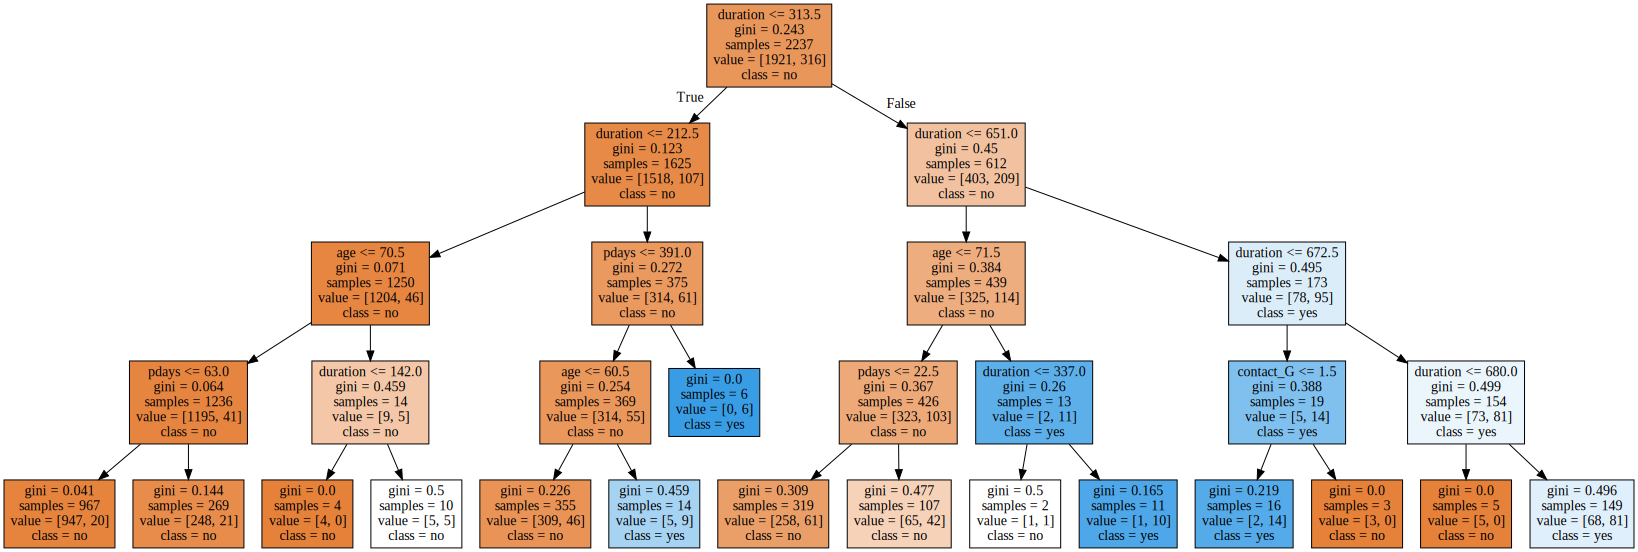

In [86]:
dot